In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras import optimizers


In [3]:
model = Sequential(
    [   ZeroPadding2D((1, 1), input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(64, (3, 3), activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 30, 30, 1)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                        

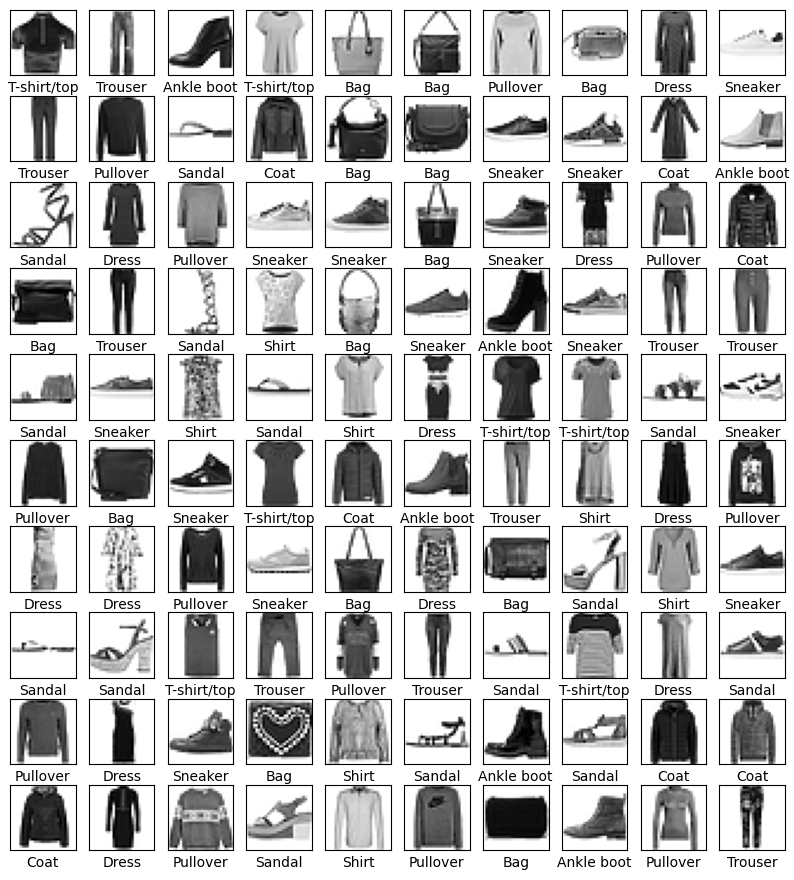

In [5]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
# Візуалізація датасету на 100 випадкових зображень
plt.figure(figsize=(10, 11))
random_indices = np.random.choice(60000, size=100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[idx]])
plt.show()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(

    optimizer=optimizers.RMSprop(),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 27s 56ms/step - loss: 0.5803 - accuracy: 0.7881
Epoch 2/10
469/469 [==============================] - 28s 59ms/step - loss: 0.3335 - accuracy: 0.8781
Epoch 3/10
469/469 [==============================] - 27s 59ms/step - loss: 0.2805 - accuracy: 0.8976
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.2473 - accuracy: 0.9087
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 0.2223 - accuracy: 0.9180
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.2017 - accuracy: 0.9256
Epoch 7/10
469/469 [==============================] - 27s 58ms/step - loss: 0.1844 - accuracy: 0.9314
Epoch 8/10
469/469 [==============================] - 27s 57ms/step - loss: 0.1704 - accuracy: 0.9362
Epoch 9/10
469/469 [==============================] - 29s 62ms/step - loss: 0.1564 - accuracy: 0.9421
Epoch 10/10
469/469 [==============================] - 29s 62ms/step - loss: 0.143

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nТочність на тестовому наборі даних: {test_acc * 100:.2f}%")

313/313 [==============================] - 3s 6ms/step - loss: 0.2407 - accuracy: 0.9188

Точність на тестовому наборі даних: 91.88%


In [8]:
test_labels = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 26ms/step


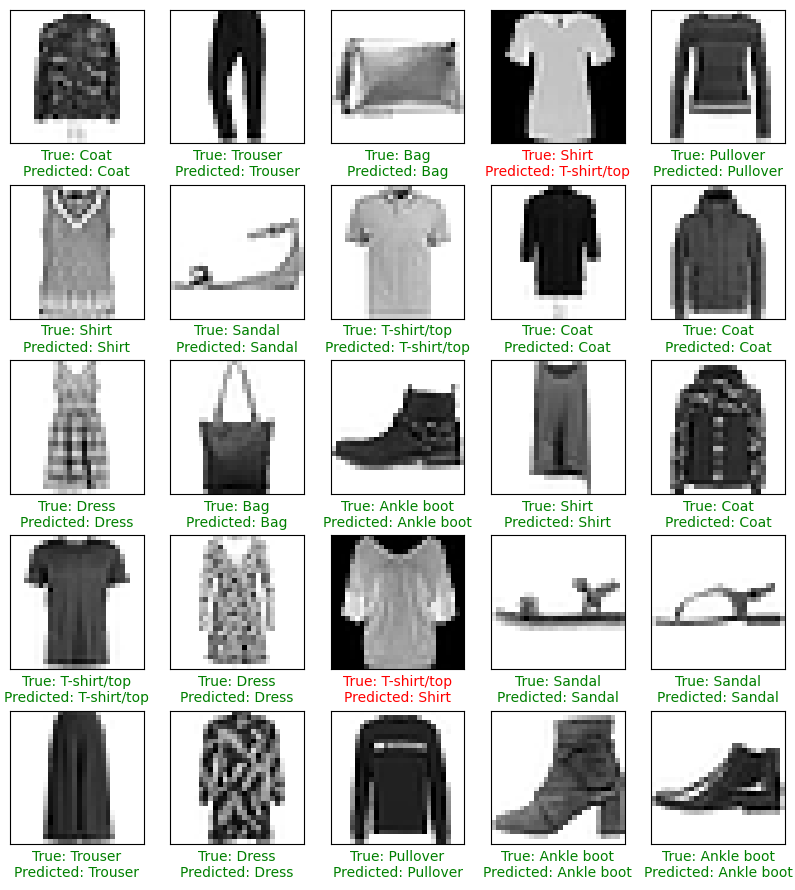

In [9]:
# Візуалізація передбачень моделі
plt.figure(figsize=(10, 11))
random_indices = np.random.choice(10000, size=25, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Передбачення за допомогою натренованої моделі
    prediction = model.predict(np.expand_dims(test_images[idx], axis=0))[0]
    predicted_label = class_names[np.argmax(prediction)]
    true_label = class_names[test_labels[idx]]
    (label_color, cmap) = ("green", "binary") if true_label == predicted_label else ("red", "gray")
    plt.imshow(test_images[idx], cmap=cmap)
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}", color=label_color)
plt.show()

Згорткова мережа дала точність 91,88% проти попереднього завдання 89,66% де використовувалася повнозв'язана мережа. ТОбто для зображень згортки дають кращий результат